# Research Topic : Weather

In this notebook, we will be researching the relationship between weather conditions and accident severity. We will also look at how the number of injuries has changed over time in different weather conditions.

**Hypothesis 1:** There are more serious injuries during weather conditions with low visibility.

**Hypothesis 2:** The number of injuries due to IMC weather has gone up over time due to the increased amount of air traffic in the past two decades.

## Data Grouping

First, we will start by importing necessary libraries and our data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/AviationData_clean.csv', index_col=0)

df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Aircraft.damage,Registration.Number,Make,Model,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Location_City,Location_State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,NC6404,Stinson,108-3,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Moose Creek,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,N5069P,Piper,PA24-180,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Bridgeport,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Destroyed,N5142R,Cessna,172M,...,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Destroyed,N1168J,Rockwell,112,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Eureka,CA
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Substantial,CF-TLU,Mcdonnell Douglas,DC9,...,Turbo Fan,Unknown,0.0,0.0,1.0,44.0,VMC,Climb,Boston,MA


In [111]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df = df[df['Event.Date'].dt.year >= 2002]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29947 entries, 51959 to 88767
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                29947 non-null  object        
 1   Investigation.Type      29947 non-null  object        
 2   Accident.Number         29947 non-null  object        
 3   Event.Date              29947 non-null  datetime64[ns]
 4   Location                29947 non-null  object        
 5   Country                 29946 non-null  object        
 6   Aircraft.damage         29947 non-null  object        
 7   Registration.Number     29947 non-null  object        
 8   Make                    29947 non-null  object        
 9   Model                   29947 non-null  object        
 10  Amateur.Built           29947 non-null  object        
 11  Number.of.Engines       29947 non-null  float64       
 12  Engine.Type             29947 non-null  object 

Now, let's take a look at the values in the Weather Condition field.

In [112]:
df['Weather.Condition'].value_counts()

Weather.Condition
VMC    28210
IMC     1572
UNK      165
Name: count, dtype: int64

There are 3 different weather conditions:
- VMC: short for Visual Meteorological Conditions, weather conditions that allow a pilot to navigate by visual reference to the ground and other landmarks (i.e. clear weather).
- IMC: short for Instrument Meteorological Conditions, weather conditions that require a pilot to rely on flight instruments (i.e. stormy or very cloudy weather).
- UNK: short for Unknown, weather data was not present in the report.

For this report, we will only be focusing on VMC and IMC values.

Let's group the dataframe by weather condition and show the sum of the injuries columns.

Let's focus on the 5 manufacturers that had the highest number of incidents.

In [140]:
df.groupby('Make')['Event.Id'].count().sort_values(ascending=False).head(5)
make_list = list(df.groupby('Make')['Event.Id'].count().sort_values(ascending=False).head(5).index)
top5_df = df[df['Make'].isin(make_list)]
top5_df['Make'].value_counts()

Make
Cessna    8108
Piper     4578
Beech     1680
Bell       799
Boeing     575
Name: count, dtype: int64

In [145]:
top5_weather_df = top5_df[(top5_df['Weather.Condition'] == 'IMC') | (top5_df['Weather.Condition'] == 'VMC')]

In [147]:
top5_weather_df_grouped = top5_weather_df.groupby(['Weather.Condition', 'Make'])
top5_weather_df_grouped['Event.Id'].count().sort_values(ascending=False)

Weather.Condition  Make  
VMC                Cessna    7646
                   Piper     4250
                   Beech     1470
                   Bell       772
                   Boeing     504
IMC                Cessna     430
                   Piper      306
                   Beech      204
                   Boeing      43
                   Bell        24
Name: Event.Id, dtype: int64

In [149]:
top5_weather_df_grouped[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].agg(['mean', 'sum'])['Total.Fatal.Injuries'].sort_values(by=('mean'), ascending=False)

mean     sum
Weather.Condition Make                    
IMC               Bell    1.958333    47.0
                  Piper   1.467320   449.0
                  Beech   1.392157   284.0
                  Cessna  1.318605   567.0
VMC               Beech   0.509524   749.0
                  Bell    0.317358   245.0
                  Piper   0.293647  1248.0
                  Boeing  0.289683   146.0
                  Cessna  0.228878  1750.0
IMC               Boeing  0.093023     4.0

## Visualization

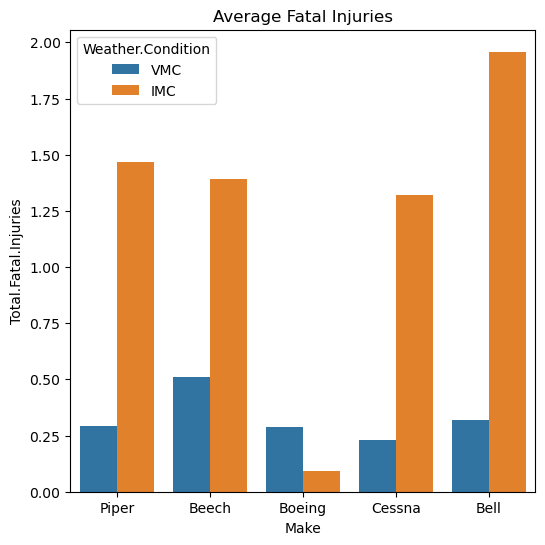

In [158]:
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(data=top5_weather_df, x='Make', y='Total.Fatal.Injuries', estimator='mean', hue='Weather.Condition', errorbar=None, ax=ax)

ax.set_title('Average Fatal Injuries')

plt.show()

## Conclusion

Boeing clearly has many less fatalities in severe weather conditions, due to being equipped with better navigation equipment. 

Therefore, a Boeing aircraft should be purchased if travel during severe weather conditions is planned.